#Mega-sena
  ### Estratégia que filtra possibilidades de apostas seguindo os volantes de somas mais frequentes
#####As listas 'sums' e 'games' correspondem às somas de todos os possíveis jogos e os possíveis jogos, respectivamente
A ideia veio de uma simples observação, ao me perguntarem qual a soma mais provável no lançamento entre dois dados (6 faces e números de 1 a 6), 11 ou 12?
Ao descrever o espaço amostral, fiquei interessado em perceber que além da resposta certa ser 11, para dois dados aleatórios, há uma soma mais provável, que no caso é a média entre a menor soma possível e a maior, o que resulta em 7
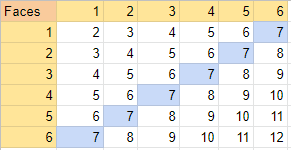

Fui testar essa teoria e compilei um histograma com 36 somas de 36 jogadas que realizei, e percebi uma distribuição que se aproxima da curva normal. Eis que me veio a ideia de sempre apostar soma 7 em jogos de dados. Ou melhor, e se aplicar essa estratégia para a loteria? A milionária MEGA-SENA de fim de ano?

Confira o meu trabalho abaixo e as conclusões.


In [2]:
#criar todas as combinações e armazenar em uma lista
from itertools import combinations 

#lista de todos os números da lotofácil
numbers= [i for i in range(1,61)]
#número de escolhas 
groupOf = 6
sums = []
games = []
for x in combinations(numbers, groupOf):
  sums.append(sum(x))
  games.append(x)

###Conferindo se o número de possíveis jogos bate com a previsão

In [10]:
import numpy as np
from scipy.special import comb
#Número de combinações de 60 números escolhem 6.
numero_de_combinacoes = scipy.special.comb(60, 6, exact=False, repetition=False)
numero_de_combinacoes == len(games)

True

##Determinando o número de possíveis somas que podem existir
### Mais tarde será útil para o histograma e o número correto de bins

In [11]:
l1=[i for i in range(1,7)]
l2=[j for j in range(55,61)]
s = sum(l2)-sum(l1)
s

324

##Plotando o histograma dos resultados analíticos das possíveis somas de todos os volantes da mega-sena

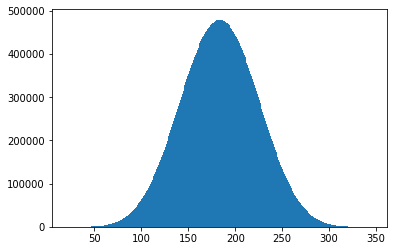

In [16]:
import matplotlib.pyplot as plt
import random
#150 pois é a diferença entre o valor máximo e o mínimo possível de soma entre os possíveis valores da lista sums
plt.hist(sums,bins = 324);

###Checando qual a soma mais frequente(mode ou moda) e em quantos jogos existem com esse valor(count)

In [17]:
from scipy import stats as st
print(st.mode(sums))

ModeResult(mode=array([183]), count=array([479632]))


Filtrando os jogos que somam a moda e fazendo um download para apostas

In [18]:
filtered = []
for i in games:
  if sum(i)==183:
    filtered.append(i)
len(filtered)

479632

In [19]:
#Downloading filteredGames dataset
#converting to csv
from google.colab import files
import pandas as pd
dict ={'jogos_que_somam_183':filtered}
DF = pd.DataFrame(dict)
DF.to_csv('183_jogos.csv')
files.download('183_jogos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Convertendo lista de somas dos volantes em um data frame para mais análises

In [20]:
dict1 = {'somas':sums}
df = pd.DataFrame(dict1)
df.shape

(50063860, 1)

In [21]:
#Estatísticas
df.describe()

,somas
count,5.006386e+07
mean,1.830000e+02
std,4.058325e+01
min,2.100000e+01
25%,1.550000e+02
50%,1.830000e+02
75%,2.110000e+02
max,3.450000e+02


Simulação com númeoros aleatórios e o comportamento bonimial

In [22]:
#simulação com sorteios aleatórios
rand = []
for i in range(2550):
  #print(sum(random.sample(range(1, 25), 15)))
  rand.append(sum(random.sample(range(1, 60), 6)))

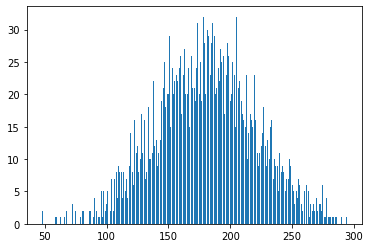

In [23]:
plt.hist(rand,bins = 324);

Conferindo estatísticas da simulação

In [24]:
l = {'random':rand}
D = pd.DataFrame(l)
D.describe()

,random
count,2550.000000
mean,180.369020
std,39.784323
min,48.000000
25%,153.000000
50%,181.000000
75%,207.000000
max,294.000000


In [25]:
#determinando a moda
print(st.mode(rand))

ModeResult(mode=array([178]), count=array([32]))


In [28]:
#upload de arquivo do computador
#Sorteios Mega-Sena, obtido em: https://asloterias.com.br/todos-resultados-mega-sena
from google.colab import files
uploaded = files.upload()

Saving mega_sena_asloterias_ate_concurso_2550_sorteio.xlsx to mega_sena_asloterias_ate_concurso_2550_sorteio.xlsx


#Analisando todos os sorteios da megasena até agora

In [29]:
#Baixando data
url = '/content/mega_sena_asloterias_ate_concurso_2550_sorteio.xlsx'
Df = pd.read_excel(url)

In [30]:
Df.head()

,As Loterias - www.asloterias.com.br - Todos Resultados da Mega Sena,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Este arquivo foi baixado no site www.asloteria...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Visite o site para baixar a versão mais atuali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TODOS RESULTADOS DA MEGA SENA POR ORDEM DE SOR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tratando dados, limpando e excluindo

In [31]:
#cleaning row 0 to 5
row = [i for i in range(0,6)]
#cleaning unused columns
col = ['As Loterias - www.asloterias.com.br - Todos Resultados da Mega Sena',
       'Unnamed: 1']
dr = Df.drop(row)
drop = dr.drop(columns = col)

In [32]:
drop.columns

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')

In [33]:
drop.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
6,59,34,4,58,10,5
7,30,10,33,1,6,35
8,25,23,29,30,9,15
9,37,10,38,25,31,57
10,34,3,48,28,23,38


In [34]:
#converting data frame to list
sorteios = drop.values.tolist()

In [37]:
#Checando os 12 primeiros sorteios
sorteios[:12]

[[59, 34, 4, 58, 10, 5],
 [30, 10, 33, 1, 6, 35],
 [25, 23, 29, 30, 9, 15],
 [37, 10, 38, 25, 31, 57],
 [34, 3, 48, 28, 23, 38],
 [57, 36, 32, 39, 20, 23],
 [25, 56, 55, 38, 45, 53],
 [46, 5, 53, 2, 27, 30],
 [25, 22, 12, 26, 55, 20],
 [47, 45, 28, 59, 10, 57],
 [28, 8, 49, 34, 41, 2],
 [59, 36, 23, 1, 33, 32]]

In [38]:
#Downloading sorteios list
drop.to_csv('sorteiosMega.csv')
files.download('sorteiosMega.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
#Analisando quantos jogos possuem ao menos 1 par de números sequenciais
gamesCount = 0
minimo = 0
limiteIndex = 5
for i in sorteios:
  #organizando as listas em ordem crescente
  i = sorted(i)
  for j in range(len(i)):
    if ((j+1)<limiteIndex) and (i[j]==i[j+1]-1):
      gamesCount+=1
      minimo+=1
      #se for encontrada uma sequencia, não precisa continuar
      if minimo >1:
        minimo = 0
        break
print('Número de jogos com ao menos uma sequencia: {}; Porcentagem: {}%'.format(gamesCount,round(100*(gamesCount/len(sorteios)),2)))

Número de jogos com ao menos uma sequencia: 945; Porcentagem: 37.06%


Com todos os sorteios em forma de lista, agora podemos analisar as somas e plotar um histograma, assim como rodar estatísticas

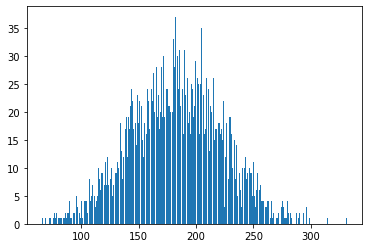

In [40]:
somasSorteios = []
for i in sorteios:
  somasSorteios.append(sum(i))
plt.hist(somasSorteios,bins = 324);

In [41]:
estatistic = pd.DataFrame({'sorteios':somasSorteios})
estatistic.head()

,sorteios
0,170
1,115
2,131
3,198
4,174


In [42]:
estatistic.describe()

,sorteios
count,2550.000000
mean,183.086667
std,40.053494
min,66.000000
25%,155.000000
50%,183.000000
75%,211.000000
max,331.000000


In [43]:
st.mode(estatistic)

ModeResult(mode=array([[182]]), count=array([[37]]))

#Conclusões
#####Foram feitas duas simulações, primeiramente a analítica em que foi analisado todo o espaço amostral, e a segunda que usou de números aleatórios para gerar a distribuição de somas. Finalmente, foram analisados resultados reais dos sorteios e comparando as estatísitcas de cada, obtemos:


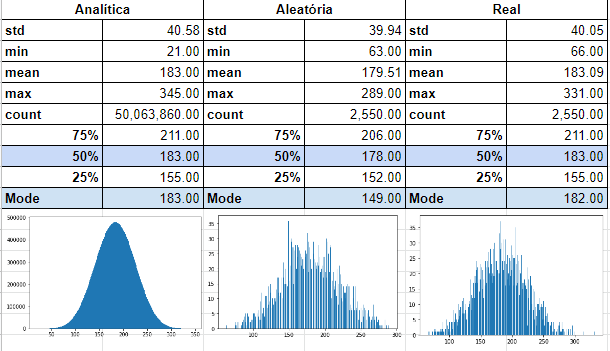

Os formatos se aproximam de uma distribuição normal, e caso não conheça e tenha interesse, procure sobre o teorema do limite central que explica mais essa correlação de variáveis aleatórias discretas e independentes formarem uma quase curva de sino ou Gaussiana.

Para encerrar, nota-se que tanto na simulação analítica e na aleatória, quanto nos dados reais, os sorteios de fato também tendem à soma média entre os possíveis 6 números, assim como no caso descrito originalmente dos dados.
Infelizmente a probabilidade não prevê o futuro, mas quem sabe pode nos dar bons palpites nas apostas? Se caso um dos sorteios somar 183, esse filtro de 479632 jogos aumentam as chances em aproximadamente 104 vezes, mas mesmo assim se torna inviável um bolão em que X pessoas apostem em 479632 bilhetes.